<a href="https://colab.research.google.com/github/OleksiiLatypov/mlzoomcamp-midterm-project/blob/main/depression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score, fbeta_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
!wget https://raw.githubusercontent.com/OleksiiLatypov/mlzoomcamp-midterm-project/refs/heads/main/final_depression_dataset_1.csv

--2024-11-11 14:05:27--  https://raw.githubusercontent.com/OleksiiLatypov/mlzoomcamp-midterm-project/refs/heads/main/final_depression_dataset_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262118 (256K) [text/plain]
Saving to: ‘final_depression_dataset_1.csv’

final_depression_da 100%[===================>] 255.97K  --.-KB/s    in 0.04s   

2024-11-11 14:05:27 (6.65 MB/s) - ‘final_depression_dataset_1.csv’ saved [262118/262118]



In [146]:
df_train = pd.read_csv('/content/train.csv')
df_original = pd.read_csv('/content/final_depression_dataset_1.csv')

 Checking the 3 rows of the train_dataset dataset

In [147]:
df_train.head(3)

,id,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


 Checking the first 3 rows of the original dataset

In [148]:
df_original.head(3)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No


* Inconsistent Data: My train data contains unneccessery column ***id***.

* ***depression*** column has the object data type (which means it's treated as a string), but it should be a numeric or categorical variable for classification tasks.

Drop the ***id*** column from the training dataset since it is an identifier

In [149]:
df_train = df_train.drop('id', axis=1)

Standardize column names by:
1. Converting all column names to lowercase for uniformity, ensuring that
    column names are case-insensitive, which is especially useful in case
    any of the column names have mixed case (e.g., 'Age' vs. 'age').
2. Replacing any spaces (' ') in column names with underscores ('_') to
    make the column names more readable and easier to work with,
    as spaces can cause issues in some operations (e.g., when referencing
    columns programmatically).
These operations help make the column names consistent and accessible
throughout the analysis or modeling process.

In [150]:
df_train.columns = df_train.columns.str.lower().str.replace(' ', '_').str.replace('_?', '')
df_original.columns = df_original.columns.str.lower().str.replace(' ', '_').str.replace('_?', '')

Convert the ***depression*** column from categorical strings ('Yes', 'No') to binary integers (1, 0).

In [151]:
df_original['depression'] = (df_original['depression'] == 'Yes').astype('int')

Concatenate the ***df_train*** and ***df_original***  DataFrames along the rows (axis=0) to combine the datasets.

In [152]:
df = pd.concat([df_train, df_original], axis=0, ignore_index=True)

Checking the first 3 rows of the joined dataset

In [153]:
df.head(3)

,name,gender,age,city,working_professional_or_student,profession,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Aaradhya,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Vivan,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Yuvraj,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1


Checking dataset shape

In [154]:
df.shape

(143256, 19)

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143256 entries, 0 to 143255
Data columns (total 19 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   name                                 143256 non-null  object 
 1   gender                               143256 non-null  object 
 2   age                                  143256 non-null  float64
 3   city                                 143256 non-null  object 
 4   working_professional_or_student      143256 non-null  object 
 5   profession                           105953 non-null  object 
 6   academic_pressure                    28399 non-null   float64
 7   work_pressure                        114836 non-null  float64
 8   cgpa                                 28400 non-null   float64
 9   study_satisfaction                   28399 non-null   float64
 10  job_satisfaction                     114844 non-null  float64
 11  sleep_duratio

Several columns have missing values (e.g., profession, academic_pressure, cgpa).
Dataset contains 10 categorical features and 9 numerical features.

Checking duplicates in dataset.

In [156]:
df.duplicated().sum()

0

There is no duplicates in dataset

Checking descriptive statistics of dataset

In [157]:
df.describe()

,age,academic_pressure,work_pressure,cgpa,study_satisfaction,job_satisfaction,work/study_hours,financial_stress,depression
count,143256.000000,28399.000000,114836.000000,28400.000000,28399.000000,114844.000000,143256.000000,143252.000000,143256.000000
mean,40.364613,3.139829,2.999408,7.657031,2.947252,2.975131,6.248597,2.988621,0.181647
std,12.383146,1.380722,1.405975,1.464505,1.360518,1.416124,3.852275,1.413664,0.385555
min,18.000000,1.000000,1.000000,5.030000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,29.000000,2.000000,2.000000,6.290000,2.000000,2.000000,3.000000,2.000000,0.000000
50%,42.000000,3.000000,3.000000,7.770000,3.000000,3.000000,6.000000,3.000000,0.000000
75%,51.000000,4.000000,4.000000,8.920000,4.000000,4.000000,10.000000,4.000000,0.000000
max,60.000000,5.000000,5.000000,10.000000,5.000000,5.000000,12.000000,5.000000,1.000000


In [158]:
df.describe(include=['object'])

,name,gender,city,working_professional_or_student,profession,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,family_history_of_mental_illness
count,143256,143256,143256,143256,105953,143256,143252,143254,143256,143256
unique,422,2,98,2,64,36,23,115,2,2
top,Rohan,Male,Kalyan,Working Professional,Teacher,Less than 5 hours,Moderate,Class 12,No,No
freq,3204,78797,6683,114853,25228,39432,50537,15004,72445,72069


Checking the percentage of missing (null) values for each column in the DataFrame:

In [159]:
percent_missing = (df.isnull().sum() / df.shape[0]) * 100
percent_missing.sort_values(ascending=False)


,0
study_satisfaction,80.176048
academic_pressure,80.176048
cgpa,80.175350
profession,26.039398
work_pressure,19.838611
job_satisfaction,19.833026
dietary_habits,0.002792
financial_stress,0.002792
degree,0.001396
family_history_of_mental_illness,0.000000


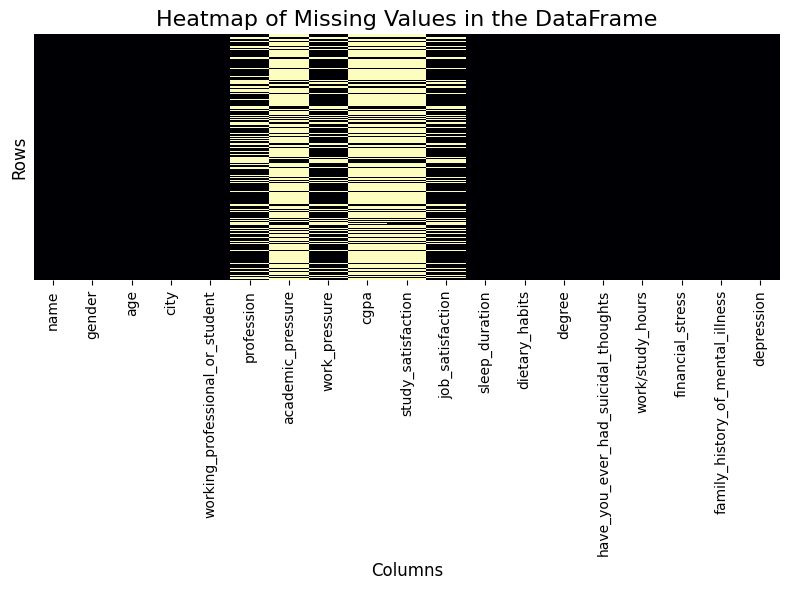

In [160]:
missing_data = df.isnull()

# Create a heatmap to visualize missing data
plt.figure(figsize=(8, 6))
sns.heatmap(missing_data, cbar=False, cmap="magma", yticklabels=False)
plt.title("Heatmap of Missing Values in the DataFrame", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.tight_layout()
plt.show()

***study_satisfaction***, ***academic_pressure***, and ***cgpa*** have approximately 80% missing. Given that the columns ***study_satisfaction***, ***academic_pressure***, and ***cgpa*** have approximately 80% missing data, dropping them is a practical decision. This high level of missingness can significantly impact the reliability and validity of your analysis.:

In [161]:
df = df.drop(['study_satisfaction', 'academic_pressure', 'cgpa'], axis=1)

Checking and identify the categorical columns in the dataset and print the number of unique values for each of them:

In [162]:
categorical_features = df.select_dtypes(include=['object', 'category'])
for col in categorical_features.columns:
  print(f'{col} has {df[col].nunique()} unique values')

name has 422 unique values
gender has 2 unique values
city has 98 unique values
working_professional_or_student has 2 unique values
profession has 64 unique values
sleep_duration has 36 unique values
dietary_habits has 23 unique values
degree has 115 unique values
have_you_ever_had_suicidal_thoughts has 2 unique values
family_history_of_mental_illness has 2 unique values


***gender***, ***working_professional_or_student***, ***have_you_ever_had_suicidal_thoughts***, and family_history_of_mental_illness each have only 2 unique values (binary features).

***name*** has 422 unique values, which likely corresponds to individual names. Since it's unlikely that names will have predictive value for depression (and likely represents a non-informative variable), it is a good candidate for removal. The same logic applies to the city column, which has 98 unique values. While geographical location can sometimes influence mental health (e.g., urban vs. rural stressors).

In [163]:
df = df.drop(['name', 'city'], axis=1)

In [164]:
res = {}
categorical_features = df.select_dtypes(include=['object', 'category'])
for col in categorical_features.columns:
    res[f'Column_{col}'] = df[col].unique()
res

{'Column_gender': array(['Female', 'Male'], dtype=object),
 'Column_working_professional_or_student': array(['Working Professional', 'Student'], dtype=object),
 'Column_profession': array(['Chef', 'Teacher', nan, 'Business Analyst', 'Finanancial Analyst',
        'Chemist', 'Electrician', 'Software Engineer', 'Data Scientist',
        'Plumber', 'Marketing Manager', 'Accountant', 'Entrepreneur',
        'HR Manager', 'UX/UI Designer', 'Content Writer',
        'Educational Consultant', 'Civil Engineer', 'Manager',
        'Pharmacist', 'Financial Analyst', 'Architect',
        'Mechanical Engineer', 'Customer Support', 'Consultant', 'Judge',
        'Researcher', 'Pilot', 'Graphic Designer', 'Travel Consultant',
        'Digital Marketer', 'Lawyer', 'Research Analyst',
        'Sales Executive', 'Doctor', 'Unemployed', 'Investment Banker',
        'Family Consultant', 'B.Com', 'BE', 'Student', 'Yogesh', 'Dev',
        'MBA', 'LLM', 'BCA', 'Academic', 'Profession', 'FamilyVirar',
      

It looks like there are some strange or inconsistent entries in the ***sleep_duration***, ***degree***, and ***dietary_habits*** columns, which might be impacting the quality of your data for analysis. Let's go through each of these columns and identify the issues and possible solutions:

 Filter and clean ***sleep_duration***, ***dietary_habits*** columns based on valid categories to handle inconsistent or incorrect data. By marking invalid entries as 'Noise'. It is standardizing the data and making sure that only meaningful values are retained. This can help ensure that the model won't be misled by unexpected or erroneous values.

In [165]:
df_original['sleep_duration'].value_counts()

,count
sleep_duration,
7-8 hours,658
Less than 5 hours,648
5-6 hours,628
More than 8 hours,622


In [166]:
def clean_columns(df: pd.DataFrame, column: str, valid_categories: List[str]) -> pd.DataFrame:
    """
    Cleans a given column in a DataFrame by replacing any values that are not in the list of valid categories
    with 'Noise'. This ensures that the column only contains valid, expected categories.

    Args:
    - df (pd.DataFrame): The pandas DataFrame containing the column to be cleaned.
    - column (str): The name of the column to clean.
    - valid_categories (List[str]): A list of valid categories that the column values should belong to.

    Returns:
    - pd.DataFrame: The updated DataFrame with the cleaned column.
    """

    # Apply a lambda function to each entry in the column to check if it's in valid categories
    df[column] = df[column].apply(lambda x: x if x in valid_categories else 'Noise')

    return df

valid_sleep_duration = [
    "Less than 5 hours", "5-6 hours", "7-8 hours", "More than 8 hours"
]
valid_dietary_habits = ["Healthy", "Moderate", "Unhealthy"]


df = clean_columns(df, 'sleep_duration', valid_sleep_duration)
df = clean_columns(df, 'dietary_habits', valid_dietary_habits)


In [167]:
df['sleep_duration'].value_counts()

,count
sleep_duration,
Less than 5 hours,39432
7-8 hours,37627
More than 8 hours,33348
5-6 hours,32770
Noise,79


In [129]:
def remove_noise(df: pd.DataFrame, columns: List[str], threshold: int = 100) -> pd.DataFrame:
    """
    Cleans specified columns in a DataFrame by replacing categories with a low frequency
    (less than the threshold) with a generic label 'Other'. This helps to deal with rare categories
    that may not add significant predictive value to the analysis.

    Args:
    - df (pd.DataFrame): The pandas DataFrame containing the columns to be cleaned.
    - columns (List[str]): A list of column names to clean.
    - threshold (int): The frequency threshold below which categories will be replaced with 'Other'.
                        Default is 100.

    Returns:
    - pd.DataFrame: The updated DataFrame with the noisy categories replaced by 'Other'.
    """

    # Iterate through each specified column
    for column in columns:
        # Get the frequency count of each category in the column
        value_counts = df[column].value_counts()

        # Identify categories with frequency less than the threshold
        low_freq_categories = value_counts[value_counts < threshold].index

        # Replace low frequency categories with 'Other'
        df[column] = df[column].apply(lambda x: x if x not in low_freq_categories else 'Other')

    return df


In [168]:
df = remove_noise(df, ['profession', 'degree'])

In [169]:
df['profession'].value_counts()

,count
profession,
Teacher,25228
Content Writer,7930
Architect,4443
Consultant,4301
HR Manager,4106
Pharmacist,3968
Doctor,3321
Business Analyst,3232
Entrepreneur,3031


Checking percentage of missing data

In [170]:
percent_missing = (df.isnull().sum() / df.shape[0]) * 100
missing_greater_zero = percent_missing[percent_missing > 0].index.to_list()
percent_missing = percent_missing.sort_values(ascending=False)
percent_missing[percent_missing > 0]

,0
profession,26.039398
work_pressure,19.838611
job_satisfaction,19.833026
financial_stress,0.002792
degree,0.001396


Lets convert ***work_pressure***, ***job_satisfaction***, and ***financial_stress*** to the object data type, treating them as categorical variables (even though they are integers, it is not continious). For each of categorical column, we are replacing any missing values (NaN) with 'Unknown', which ensures there are no missing values in categorical columns and they are ready for analysis or modeling.

In [173]:
df['work_pressure'] = df['work_pressure'].astype('float')
df['job_satisfaction'] = df['job_satisfaction'].astype('float')
df['financial_stress'] = df['financial_stress'].astype('float')

In [174]:
fill_with_mode = ['work_pressure', 'job_satisfaction', 'financial_stress']
for col in fill_with_mode:
  df[col] = df[col].fillna(df[col].mode()[0])


In [176]:
fill_with_mode = ['profession', 'degree']
for col in fill_with_mode:
  df[col] = df[col].fillna('Unknown')


In [177]:
df.head()

,gender,age,working_professional_or_student,profession,work_pressure,job_satisfaction,sleep_duration,dietary_habits,degree,have_you_ever_had_suicidal_thoughts,work/study_hours,financial_stress,family_history_of_mental_illness,depression
0,Female,49.0,Working Professional,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0
1,Male,26.0,Working Professional,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1
2,Male,33.0,Student,Unknown,2.0,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
3,Male,22.0,Working Professional,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1
4,Female,30.0,Working Professional,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0


<Figure size 600x400 with 0 Axes>

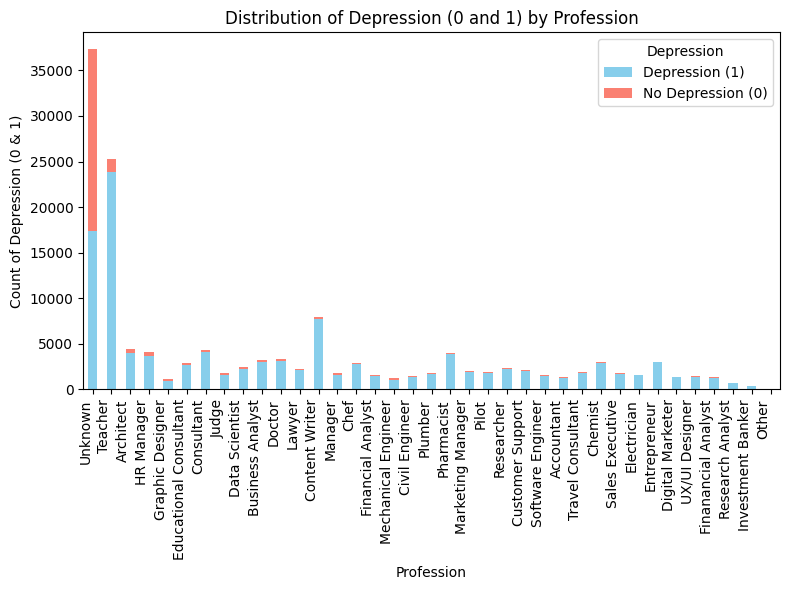

In [188]:
plt.figure(figsize=(6, 4))

# Step 1: Group by 'profession' and 'depression' to get counts
depression_counts = df.groupby(['profession', 'depression']).size().unstack(fill_value=0).sort_values(by=1, ascending=False)

# Step 2: Create the stacked bar plot
ax = depression_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))  # Adjusted figsize for smaller plot

# Step 3: Customize the plot
plt.xlabel('Profession')
plt.ylabel('Count of Depression (0 & 1)')
plt.title('Distribution of Depression (0 and 1) by Profession')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Depression', labels=['Depression (1)', 'No Depression (0)'])

# Show the plot
plt.tight_layout()
plt.show()


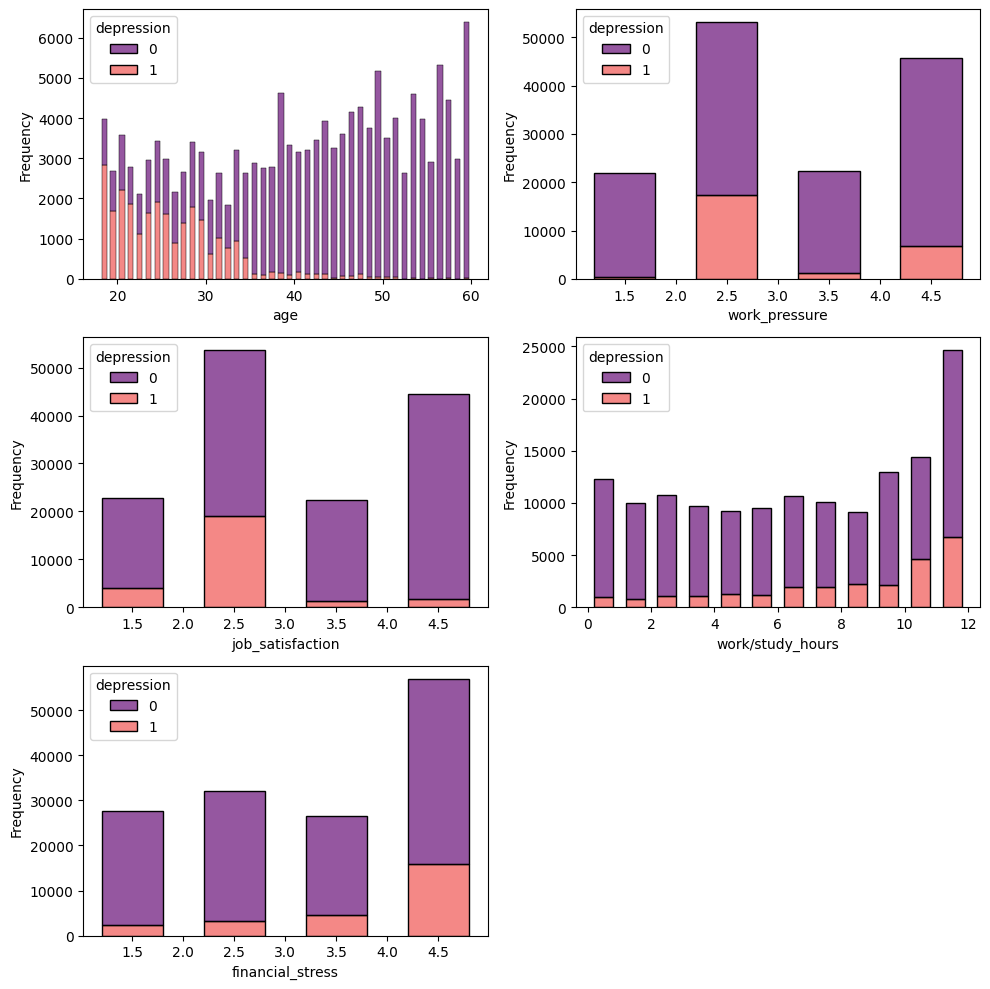

In [190]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'df' is your DataFrame and 'depression' is the target column
# # Select numerical features
# numerical_features = df.select_dtypes(include=['number'])

# # Set the figure size
# plt.figure(figsize=(15, 10))

# # Loop through the numerical features, skipping the last column if it's the target column
# for i, feature in enumerate(numerical_features.iloc[:, :-1], 1):  # Exclude the target column
#     plt.subplot(3, 3, i)  # Adjust the grid size based on the number of features
#     sns.histplot(df, x=feature, hue='depression', multiple='stack', palette='magma', binwidth=1, shrink=0.6)
#     plt.xlabel(feature)
#     plt.ylabel('Frequency')

# # Adjust layout to avoid overlap
# plt.tight_layout()
# plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'depression' is the target column
# Select numerical features
numerical_features = df.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(10, 10))

# Define the number of rows and columns for 2 plots per row
num_features = len(numerical_features.columns) - 1  # Exclude the target column
num_cols = 2
num_rows = (num_features + 1) // num_cols  # Calculate the number of rows needed

# Loop through the numerical features, skipping the last column if it's the target column
for i, feature in enumerate(numerical_features.iloc[:, :-1], 1):  # Exclude the target column
    plt.subplot(num_rows, num_cols, i)  # Set up the subplot grid with 2 columns
    sns.histplot(df, x=feature, hue='depression', multiple='stack', palette='magma', binwidth=1, shrink=0.6)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


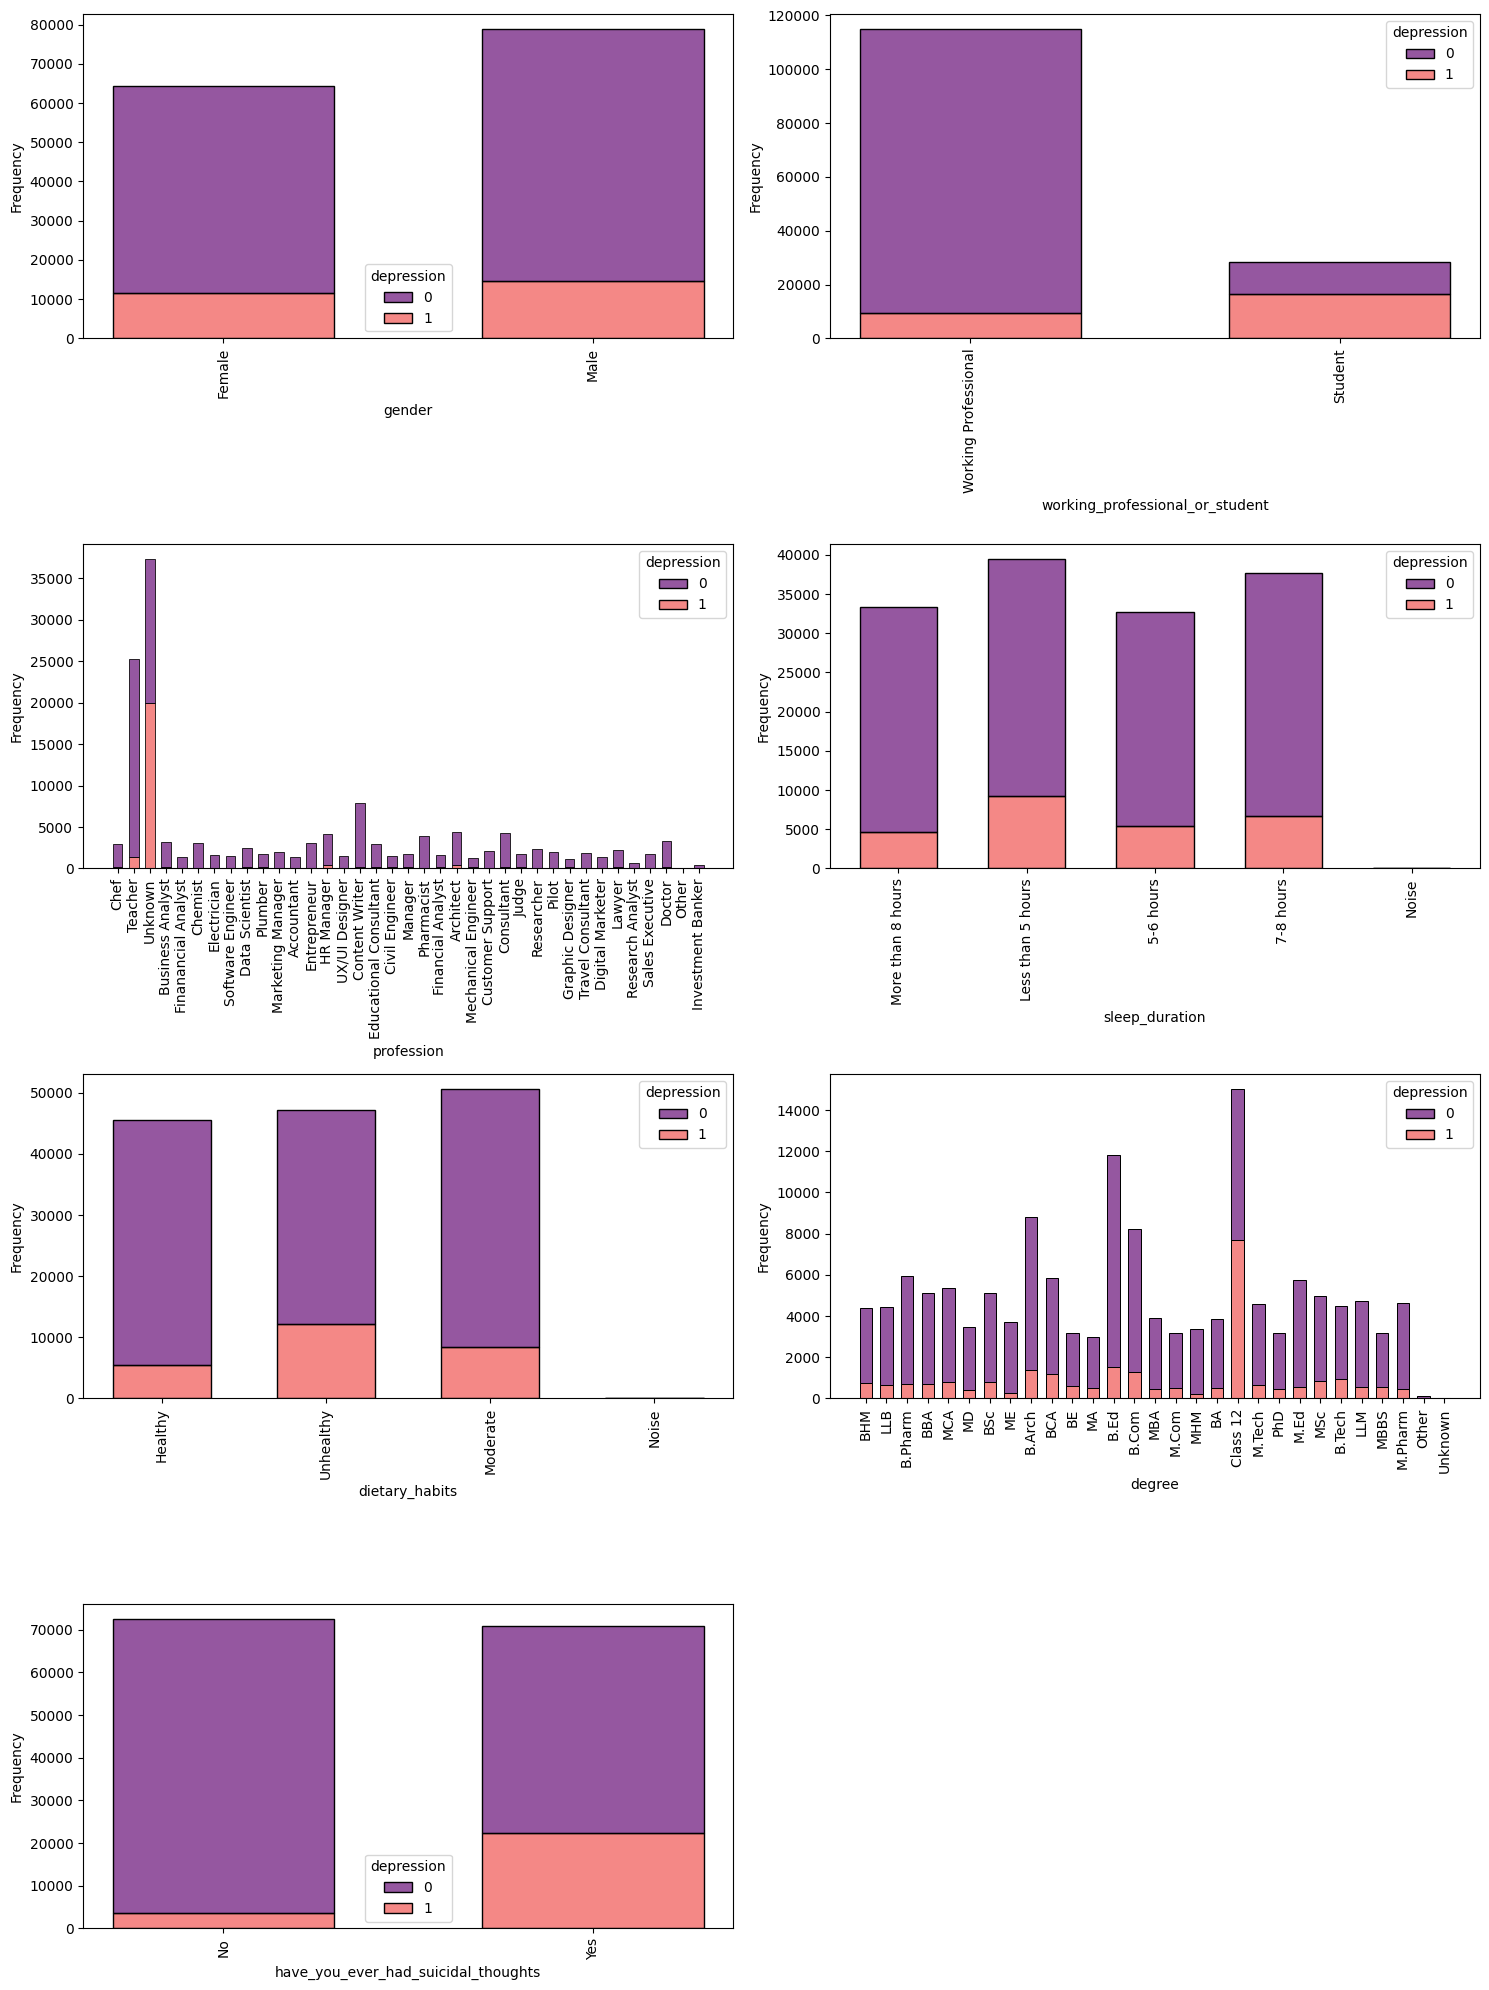

In [201]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'depression' is the target column
# Select categorical features
cat_c = df.select_dtypes(include=['object'])

# Set the figure size
plt.figure(figsize=(15, 20))
cat_col = len(cat_c.columns)
num_cols = 2
num_rows = (cat_col + 1) // num_cols  # Ensure enough rows for all columns

# Loop through the categorical features, skipping the last column if it's the target column
for i, feature in enumerate(cat_c.iloc[:, :-1], 1):  # Exclude the target column
    plt.subplot(num_rows, num_cols, i)  # Adjust the grid size based on the number of features
    sns.histplot(df, x=feature, hue='depression', multiple='stack', palette='magma', shrink=0.6)
    plt.xlabel(feature)
    plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


In [ ]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
y = df_full_train.depression
X = df_full_train.drop('depression', axis=1)

In [ ]:
from sklearn.feature_extraction import DictVectorizer

def transform_data(X_train, X_test, dv):
    """
    Transforms the training and testing data using DictVectorizer.

    Parameters:
    - X_train: The training features as a pandas DataFrame.
    - X_test: The testing features as a pandas DataFrame.
    - dv: The DictVectorizer instance to use for transforming data.

    Returns:
    - X_train_transformed: Transformed training features as a dense NumPy array.
    - X_test_transformed: Transformed testing features as a dense NumPy array.
    """
    # Convert data to dictionaries
    X_train_dict = X_train.to_dict(orient='records')
    X_test_dict = X_test.to_dict(orient='records')

    # Transform the data using DictVectorizer
    X_train_transformed = dv.fit_transform(X_train_dict)  # Fit and transform on training data
    X_test_transformed = dv.transform(X_test_dict)  # Only transform on test data

    return X_train_transformed, X_test_transformed


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.feature_extraction import DictVectorizer

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)  # Set sparse=False for dense array output

# Lists to store metrics
accuracy_scores_rf = []
precision_scores_rf = []
recall_scores_rf = []
f1_scores_rf = []
roc_auc_scores_rf = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transform the data using the defined function
    X_train_transformed, X_test_transformed = transform_data(X_train, X_test, dv)

    # Train the model
    model_rf.fit(X_train_transformed, y_train)

    # Get predicted class labels
    y_pred = model_rf.predict(X_test_transformed)
    y_prob = model_rf.predict_proba(X_test_transformed)[:, 1]  # Probabilities for ROC AUC

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_rf.append(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    precision_scores_rf.append(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    recall_scores_rf.append(recall)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    f1_scores_rf.append(f1)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores_rf.append(roc_auc)

    # Print metrics for each fold
    print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Average scores across all folds for Random Forest
print(f"RF Average Accuracy: {sum(accuracy_scores_rf) / len(accuracy_scores_rf):.4f}")
print(f"RF Average Precision: {sum(precision_scores_rf) / len(precision_scores_rf):.4f}")
print(f"RF Average Recall: {sum(recall_scores_rf) / len(recall_scores_rf):.4f}")
print(f"RF Average F1 Score: {sum(f1_scores_rf) / len(f1_scores_rf):.4f}")
print(f"RF Average ROC AUC: {sum(roc_auc_scores_rf) / len(roc_auc_scores_rf):.4f}")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.feature_extraction import DictVectorizer

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train
model_lr = LogisticRegression(class_weight='balanced', random_state=42)

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)  # Set sparse=False for dense array output

# Lists to store metrics
accuracy_scores_lr = []
precision_scores_lr = []
recall_scores_lr = []
f1_scores_lr = []
roc_auc_scores_lr = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transform the data using the defined function
    X_train_transformed, X_test_transformed = transform_data(X_train, X_test, dv)

    # Train the model
    model_lr.fit(X_train_transformed, y_train)

    # Get predicted class labels
    y_pred = model_lr.predict(X_test_transformed)
    y_prob = model_lr.predict_proba(X_test_transformed)[:, 1]  # Probabilities for ROC AUC

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_lr.append(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    precision_scores_lr.append(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    recall_scores_lr.append(recall)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    f1_scores_lr.append(f1)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores_lr.append(roc_auc)

    # Print metrics for each fold
    print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Average scores across all folds for Logistic Regression
print(f"LR Average Accuracy: {sum(accuracy_scores_lr) / len(accuracy_scores_lr):.4f}")
print(f"LR Average Precision: {sum(precision_scores_lr) / len(precision_scores_lr):.4f}")
print(f"LR Average Recall: {sum(recall_scores_lr) / len(recall_scores_lr):.4f}")
print(f"LR Average F1 Score: {sum(f1_scores_lr) / len(f1_scores_lr):.4f}")
print(f"LR Average ROC AUC: {sum(roc_auc_scores_lr) / len(roc_auc_scores_lr):.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9032, Precision: 0.6690, Recall: 0.9271, F1 Score: 0.7772, ROC AUC: 0.9689


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9056, Precision: 0.6769, Recall: 0.9207, F1 Score: 0.7802, ROC AUC: 0.9684


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9073, Precision: 0.6790, Recall: 0.9305, F1 Score: 0.7851, ROC AUC: 0.9706


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9072, Precision: 0.6792, Recall: 0.9286, F1 Score: 0.7846, ROC AUC: 0.9710
Fold Accuracy: 0.9055, Precision: 0.6753, Recall: 0.9264, F1 Score: 0.7812, ROC AUC: 0.9694
LR Average Accuracy: 0.9058
LR Average Precision: 0.6759
LR Average Recall: 0.9266
LR Average F1 Score: 0.7816
LR Average ROC AUC: 0.9696


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.feature_extraction import DictVectorizer

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train (XGBoost)
model_xgb = XGBClassifier(scale_pos_weight=1, random_state=42, eval_metric='logloss')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)  # Set sparse=False for dense array output

# Lists to store metrics
accuracy_scores_xgb = []
precision_scores_xgb = []
recall_scores_xgb = []
f1_scores_xgb = []
roc_auc_scores_xgb = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transform the data using the defined function
    X_train_transformed, X_test_transformed = transform_data(X_train, X_test, dv)

    # Train the model
    model_xgb.fit(X_train_transformed, y_train)

    # Get predicted class labels
    y_pred = model_xgb.predict(X_test_transformed)
    y_prob = model_xgb.predict_proba(X_test_transformed)[:, 1]  # Probabilities for ROC AUC

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_xgb.append(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    precision_scores_xgb.append(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    recall_scores_xgb.append(recall)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    f1_scores_xgb.append(f1)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores_xgb.append(roc_auc)

    # Print metrics for each fold
    print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Average scores across all folds for XGBoost
print(f"XGBoost Average Accuracy: {sum(accuracy_scores_xgb) / len(accuracy_scores_xgb):.4f}")
print(f"XGBoost Average Precision: {sum(precision_scores_xgb) / len(precision_scores_xgb):.4f}")
print(f"XGBoost Average Recall: {sum(recall_scores_xgb) / len(recall_scores_xgb):.4f}")
print(f"XGBoost Average F1 Score: {sum(f1_scores_xgb) / len(f1_scores_xgb):.4f}")
print(f"XGBoost Average ROC AUC: {sum(roc_auc_scores_xgb) / len(roc_auc_scores_xgb):.4f}")


Fold Accuracy: 0.9278, Precision: 0.8058, Recall: 0.7948, F1 Score: 0.8003, ROC AUC: 0.9678
Fold Accuracy: 0.9305, Precision: 0.8157, Recall: 0.7989, F1 Score: 0.8072, ROC AUC: 0.9682
Fold Accuracy: 0.9312, Precision: 0.8104, Recall: 0.8118, F1 Score: 0.8111, ROC AUC: 0.9705
Fold Accuracy: 0.9312, Precision: 0.8090, Recall: 0.8144, F1 Score: 0.8117, ROC AUC: 0.9706
Fold Accuracy: 0.9296, Precision: 0.8132, Recall: 0.7962, F1 Score: 0.8046, ROC AUC: 0.9692
XGBoost Average Accuracy: 0.9301
XGBoost Average Precision: 0.8108
XGBoost Average Recall: 0.8032
XGBoost Average F1 Score: 0.8070
XGBoost Average ROC AUC: 0.9693


Fold Accuracy: 0.9278, Precision: 0.8058, Recall: 0.7948, F1 Score: 0.8003, ROC AUC: 0.9678
Fold Accuracy: 0.9305, Precision: 0.8157, Recall: 0.7989, F1 Score: 0.8072, ROC AUC: 0.9682
Fold Accuracy: 0.9312, Precision: 0.8104, Recall: 0.8118, F1 Score: 0.8111, ROC AUC: 0.9705
Fold Accuracy: 0.9312, Precision: 0.8090, Recall: 0.8144, F1 Score: 0.8117, ROC AUC: 0.9706
Fold Accuracy: 0.9296, Precision: 0.8132, Recall: 0.7962, F1 Score: 0.8046, ROC AUC: 0.9692
XGBoost Average Accuracy: 0.9301
XGBoost Average Precision: 0.8108
XGBoost Average Recall: 0.8032
XGBoost Average F1 Score: 0.8070
XGBoost Average ROC AUC: 0.9693
Feature Importance:
                                               Feature  Importance
40           have_you_ever_had_suicidal_thoughts_?=No    0.277797
90            working_professional_or_student=Student    0.130430
0                                                 age    0.128003
80                                 profession=Unknown    0.036112
42                        

<ipython-input-319-1d7ff63ca29a>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


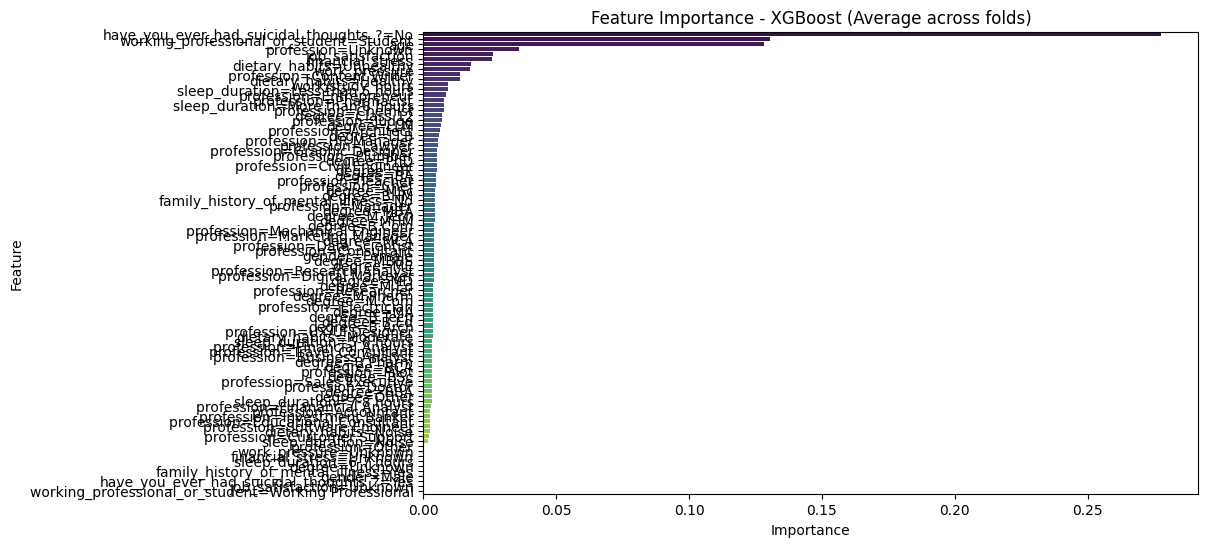

In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.feature_extraction import DictVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

# Model to train (XGBoost)
model_xgb = XGBClassifier(scale_pos_weight=1, random_state=42, eval_metric='logloss')

# Initialize DictVectorizer
dv = DictVectorizer(sparse=False)  # Set sparse=False for dense array output

# Lists to store metrics
accuracy_scores_xgb = []
precision_scores_xgb = []
recall_scores_xgb = []
f1_scores_xgb = []
roc_auc_scores_xgb = []

# List to store feature importances for each fold
feature_importances_list = []

# Cross-validation process
for train_index, test_index in skf.split(X, y):
    # Split data into training and testing sets
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Transform the data using DictVectorizer
    X_train_transformed, X_test_transformed = transform_data(X_train, X_test, dv)

    # Train the model
    model_xgb.fit(X_train_transformed, y_train)

    # Get predicted class labels
    y_pred = model_xgb.predict(X_test_transformed)
    y_prob = model_xgb.predict_proba(X_test_transformed)[:, 1]  # Probabilities for ROC AUC

    # Calculate Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores_xgb.append(accuracy)

    # Calculate Precision
    precision = precision_score(y_test, y_pred)
    precision_scores_xgb.append(precision)

    # Calculate Recall
    recall = recall_score(y_test, y_pred)
    recall_scores_xgb.append(recall)

    # Calculate F1 Score
    f1 = f1_score(y_test, y_pred)
    f1_scores_xgb.append(f1)

    # Calculate ROC AUC
    roc_auc = roc_auc_score(y_test, y_prob)
    roc_auc_scores_xgb.append(roc_auc)

    # Get the feature importances for the current fold
    feature_importances = model_xgb.feature_importances_
    feature_importances_list.append(feature_importances)

    # Print metrics for each fold
    print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

# Average scores across all folds for XGBoost
print(f"XGBoost Average Accuracy: {np.mean(accuracy_scores_xgb):.4f}")
print(f"XGBoost Average Precision: {np.mean(precision_scores_xgb):.4f}")
print(f"XGBoost Average Recall: {np.mean(recall_scores_xgb):.4f}")
print(f"XGBoost Average F1 Score: {np.mean(f1_scores_xgb):.4f}")
print(f"XGBoost Average ROC AUC: {np.mean(roc_auc_scores_xgb):.4f}")

# Aggregate feature importances (average across folds)
average_feature_importances = np.mean(feature_importances_list, axis=0)

# Get feature names from DictVectorizer
feature_names = dv.get_feature_names_out()

# Create a DataFrame to combine feature names with their importance values
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': average_feature_importances
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:\n", importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - XGBoost (Average across folds)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature Importance:
                                               Feature  Importance
40           have_you_ever_had_suicidal_thoughts_?=No    0.277797
90            working_professional_or_student=Student    0.130430
0                                                 age    0.128003
80                                 profession=Unknown    0.036112
42                                   job_satisfaction    0.026036
..                                                ...         ...
35               family_history_of_mental_illness=Yes    0.000000
39                                        gender=Male    0.000000
41          have_you_ever_had_suicidal_thoughts_?=Yes    0.000000
43                           job_satisfaction=Unknown    0.000000
91  working_professional_or_student=Working Profes...    0.000000

[92 rows x 2 columns]


<ipython-input-323-9ceda06d0757>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')


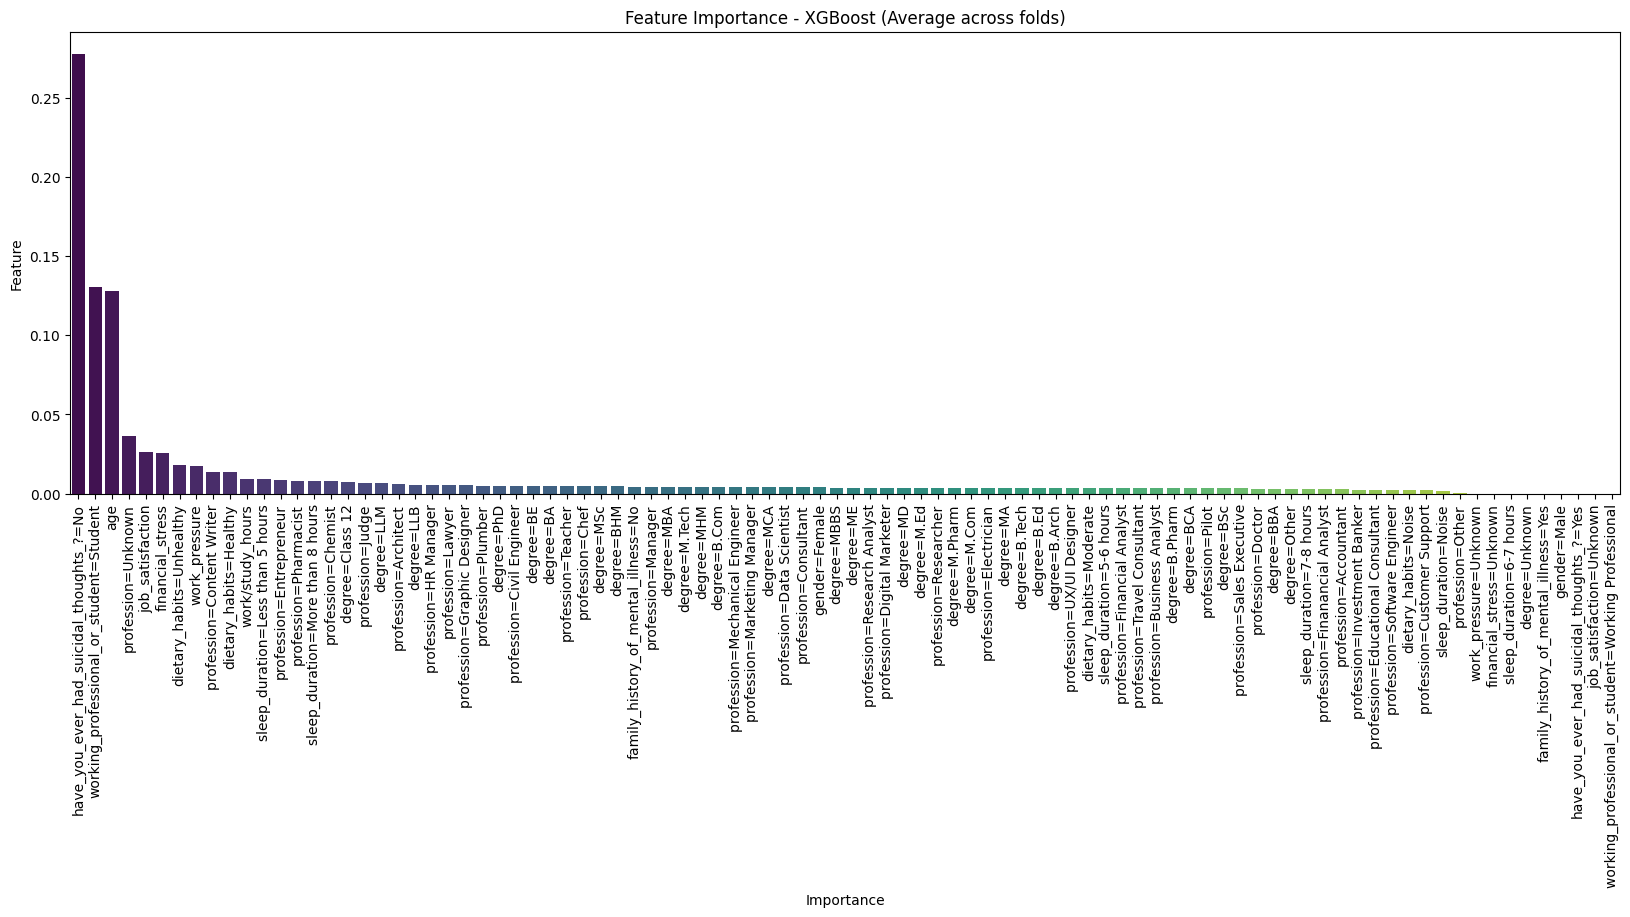

In [ ]:
# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("Feature Importance:\n", importance_df)

# Plot the feature importance
plt.figure(figsize=(20, 6))
sns.barplot(x='Feature', y='Importance', data=importance_df, palette='viridis')
plt.title('Feature Importance - XGBoost (Average across folds)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

   Feature  Importance
0       f0       833.0
79     f87       589.0
34     f36       383.0
80     f88       320.0
37     f42       301.0
..     ...         ...
31     f32         6.0
81     f90         6.0
27     f27         5.0
46     f52         5.0
63     f69         4.0

[82 rows x 2 columns]


<ipython-input-317-9d87db533c90>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=True), palette='viridis')


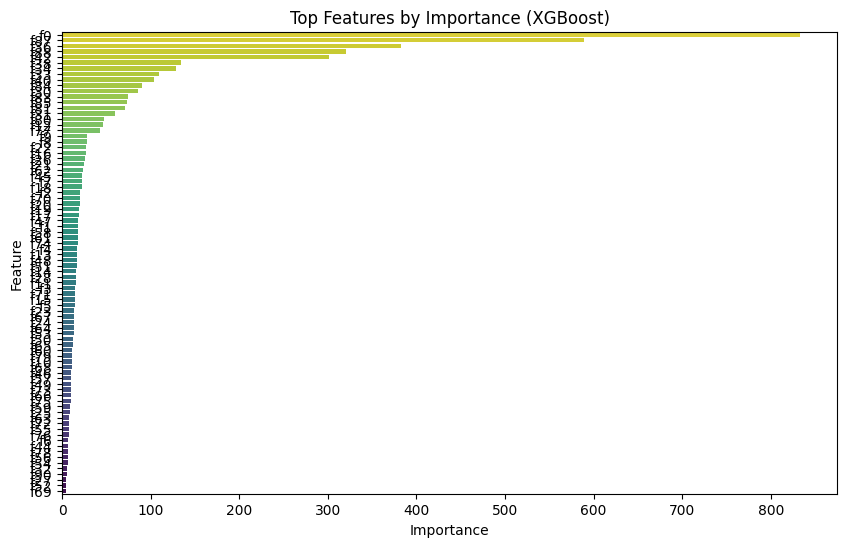

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Train the XGBoost model (assuming you've already trained the model)
model_xgb = XGBClassifier(scale_pos_weight=1, random_state=42, eval_metric='logloss')

# Assuming the model is trained on X_train_transformed, for example
model_xgb.fit(X_train_transformed, y_train)

# Extract feature importance
feature_importance = model_xgb.get_booster().get_score(importance_type='weight')  # You can also use 'gain' or 'cover'

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({
    'Feature': list(feature_importance.keys()),
    'Importance': list(feature_importance.values())
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importance
print(importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.sort_values(by='Importance', ascending=True), palette='viridis')
plt.xlabel('Importance')
plt.title('Top Features by Importance (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.feature_extraction import DictVectorizer
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Define the function to calculate metrics for different models
def evaluate_model(X, y, model, transform_func):
    # Define StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # 5-fold cross-validation

    # Initialize DictVectorizer
    dv = DictVectorizer(sparse=False)  # Set sparse=False for dense array output

    # Lists to store metrics
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    roc_auc_scores = []

    # Cross-validation process
    for train_index, test_index in skf.split(X, y):
        # Split data into training and testing sets
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Transform the data using the defined function
        X_train_transformed, X_test_transformed = transform_func(X_train, X_test, dv)

        # Train the model
        model.fit(X_train_transformed, y_train)

        # Get predicted class labels
        y_pred = model.predict(X_test_transformed)
        y_prob = model.predict_proba(X_test_transformed)[:, 1]  # Probabilities for ROC AUC

        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores.append(accuracy)

        # Calculate Precision
        precision = precision_score(y_test, y_pred)
        precision_scores.append(precision)

        # Calculate Recall
        recall = recall_score(y_test, y_pred)
        recall_scores.append(recall)

        # Calculate F1 Score
        f1 = f1_score(y_test, y_pred)
        f1_scores.append(f1)

        # Calculate ROC AUC
        roc_auc = roc_auc_score(y_test, y_prob)
        roc_auc_scores.append(roc_auc)

        # Print metrics for each fold
        print(f"Fold Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")

    # Average scores across all folds
    print(f"Average Accuracy: {sum(accuracy_scores) / len(accuracy_scores):.4f}")
    print(f"Average Precision: {sum(precision_scores) / len(precision_scores):.4f}")
    print(f"Average Recall: {sum(recall_scores) / len(recall_scores):.4f}")
    print(f"Average F1 Score: {sum(f1_scores) / len(f1_scores):.4f}")
    print(f"Average ROC AUC: {sum(roc_auc_scores) / len(roc_auc_scores):.4f}")

# Example of how to call the function with different models

# Prepare your data (X, y)
# X, y = your_dataframe.drop(columns='target'), your_dataframe['target']

# Evaluate XGBoost model
model_xgb = XGBClassifier(scale_pos_weight=1, random_state=42, eval_metric='logloss')
evaluate_model(X, y, model_xgb, transform_data)

# Evaluate Logistic Regression model
model_lr = LogisticRegression(random_state=42)
evaluate_model(X, y, model_lr, transform_data)

# Evaluate Random Forest Classifier model
model_rf = RandomForestClassifier(class_weight='balanced', random_state=42)
evaluate_model(X, y, model_rf, transform_data)


Fold Accuracy: 0.9278, Precision: 0.8058, Recall: 0.7948, F1 Score: 0.8003, ROC AUC: 0.9678
Fold Accuracy: 0.9305, Precision: 0.8157, Recall: 0.7989, F1 Score: 0.8072, ROC AUC: 0.9682
Fold Accuracy: 0.9312, Precision: 0.8104, Recall: 0.8118, F1 Score: 0.8111, ROC AUC: 0.9705
Fold Accuracy: 0.9312, Precision: 0.8090, Recall: 0.8144, F1 Score: 0.8117, ROC AUC: 0.9706
Fold Accuracy: 0.9296, Precision: 0.8132, Recall: 0.7962, F1 Score: 0.8046, ROC AUC: 0.9692
Average Accuracy: 0.9301
Average Precision: 0.8108
Average Recall: 0.8032
Average F1 Score: 0.8070
Average ROC AUC: 0.9693


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9278, Precision: 0.8154, Recall: 0.7795, F1 Score: 0.7971, ROC AUC: 0.9689


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9316, Precision: 0.8252, Recall: 0.7919, F1 Score: 0.8082, ROC AUC: 0.9684


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9307, Precision: 0.8155, Recall: 0.8000, F1 Score: 0.8077, ROC AUC: 0.9706


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9321, Precision: 0.8215, Recall: 0.8010, F1 Score: 0.8111, ROC AUC: 0.9710


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fold Accuracy: 0.9303, Precision: 0.8217, Recall: 0.7881, F1 Score: 0.8046, ROC AUC: 0.9693
Average Accuracy: 0.9305
Average Precision: 0.8199
Average Recall: 0.7921
Average F1 Score: 0.8057
Average ROC AUC: 0.9696
Fold Accuracy: 0.9234, Precision: 0.8091, Recall: 0.7579, F1 Score: 0.7827, ROC AUC: 0.9625
Fold Accuracy: 0.9250, Precision: 0.8170, Recall: 0.7577, F1 Score: 0.7862, ROC AUC: 0.9618
Fold Accuracy: 0.9260, Precision: 0.8144, Recall: 0.7682, F1 Score: 0.7906, ROC AUC: 0.9654
Fold Accuracy: 0.9258, Precision: 0.8154, Recall: 0.7658, F1 Score: 0.7898, ROC AUC: 0.9646
Fold Accuracy: 0.9260, Precision: 0.8236, Recall: 0.7555, F1 Score: 0.7880, ROC AUC: 0.9645
Average Accuracy: 0.9252
Average Precision: 0.8159
Average Recall: 0.7610
Average F1 Score: 0.7875
Average ROC AUC: 0.9638


In [ ]:
group_study_satisfaction = df.groupby(['study_satisfaction'])['depression'].agg(['mean', 'count'])
group_study_satisfaction

,mean,count
study_satisfaction,,
1.0,0.707965,5537
2.0,0.644949,5940
3.0,0.574587,5926
4.0,0.511272,6476
5.0,0.468805,4520


In [ ]:
group_profession = df.groupby(['profession'])['depression'].agg(['mean', 'count'])
group_profession.sort_values(by='count', ascending=False)[:15]

,mean,count
profession,,
Teacher,0.056049,25228
Content Writer,0.018916,7930
Architect,0.099482,4443
Consultant,0.047431,4301
HR Manager,0.107647,4106
Pharmacist,0.026462,3968
Doctor,0.052996,3321
Business Analyst,0.057240,3232
Entrepreneur,0.020785,3031


<Figure size 800x400 with 0 Axes>

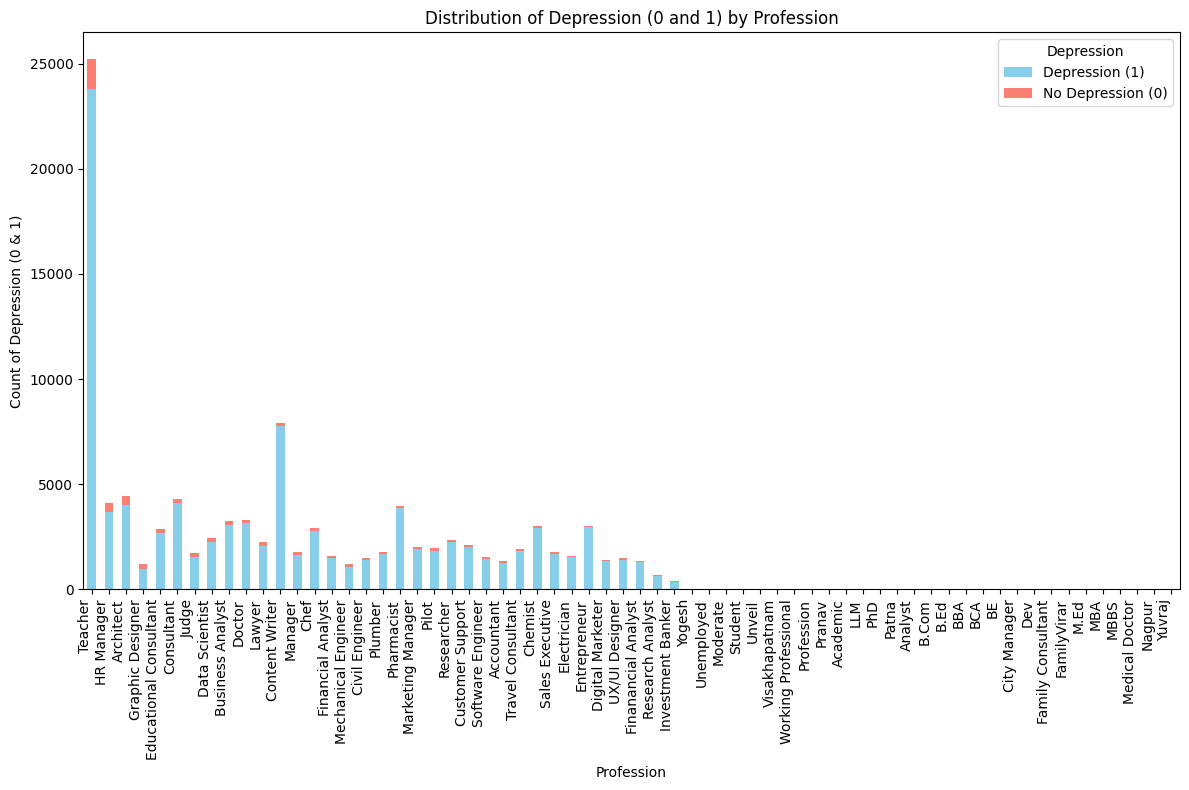

In [ ]:

# Example DataFrame
# df = your actual DataFrame
plt.figure(figsize=(8,4))
# Step 1: Group by 'profession' and 'depression' to get counts
depression_counts = df.groupby(['profession', 'depression']).size().unstack(fill_value=0).sort_values(by=1, ascending=False)

# Step 2: Create the stacked bar plot

ax = depression_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(12, 8))

# Step 3: Customize the plot
plt.xlabel('Profession')
plt.ylabel('Count of Depression (0 & 1)')
plt.title('Distribution of Depression (0 and 1) by Profession')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for readability
plt.legend(title='Depression', labels=['Depression (1)', 'No Depression (0)'])

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
depression_counts = df.groupby(['dietary_habits', 'depression']).size().unstack(fill_value=0).sort_values(by=1, ascending=False)
depression_counts

depression,0,1
dietary_habits,,
Unhealthy,34861,12248
Moderate,42163,8374
Healthy,40192,5391
1.0,0,1
Indoor,0,1
No Healthy,0,1
Male,0,1
M.Tech,0,1
Yes,1,1


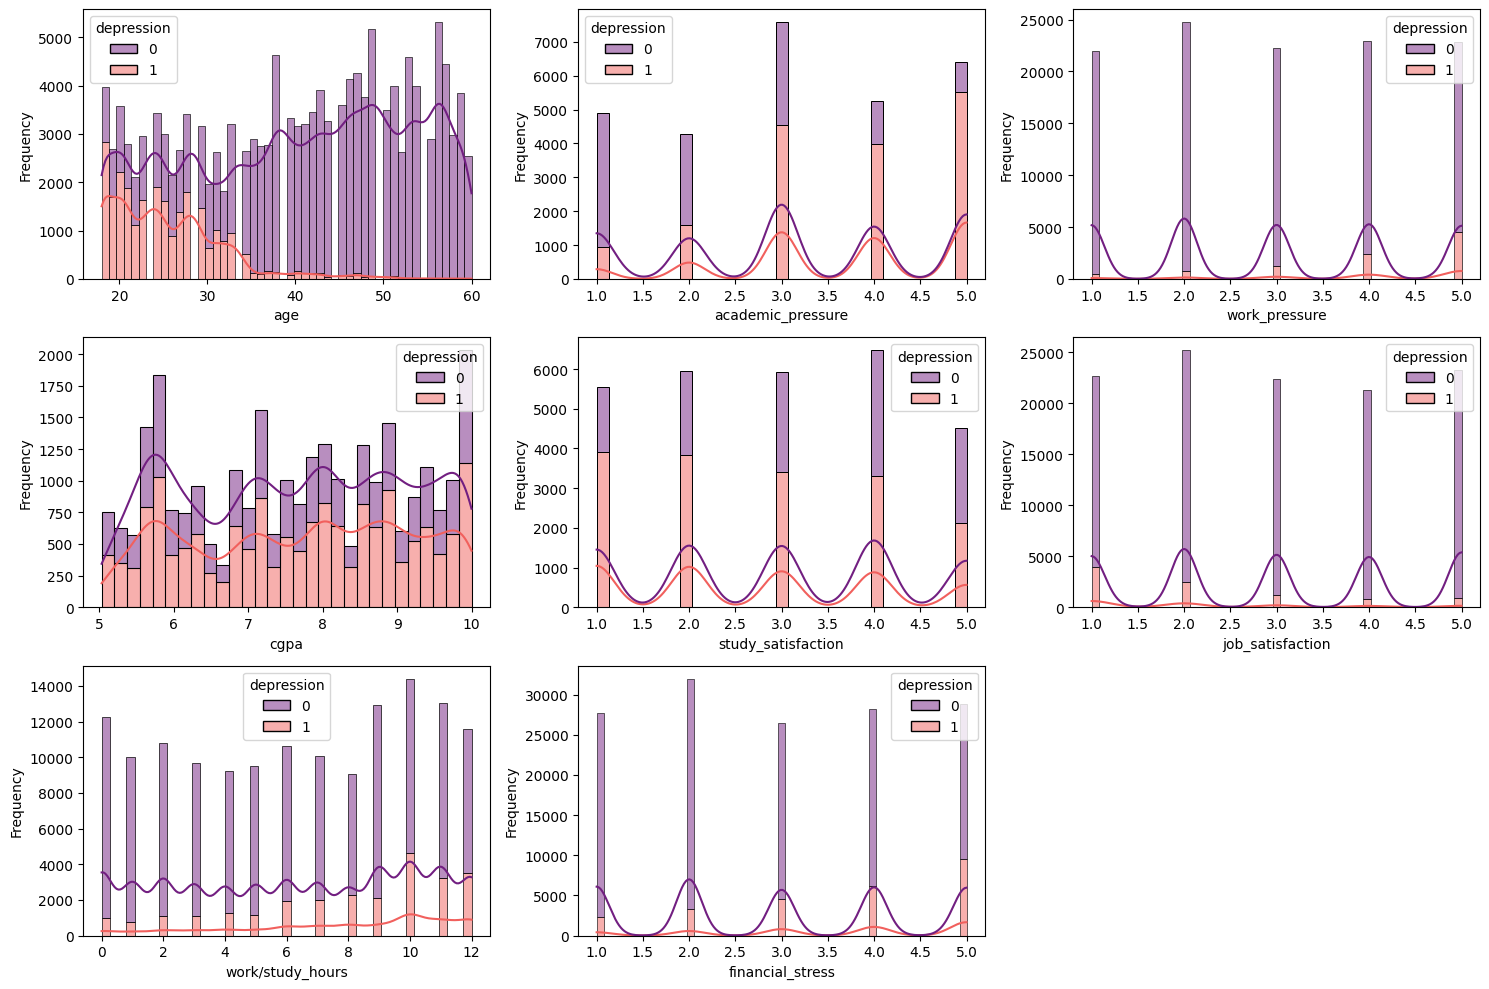

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'depression' is the target column
# Select numerical features
numerical_features = df.select_dtypes(include=['number'])

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through the numerical features, skipping the last column if it's the target column
for i, feature in enumerate(numerical_features.iloc[:, :-1], 1):  # Exclude the target column
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of features
    sns.histplot(df, x=feature, hue='depression', kde=True, multiple='stack', palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()


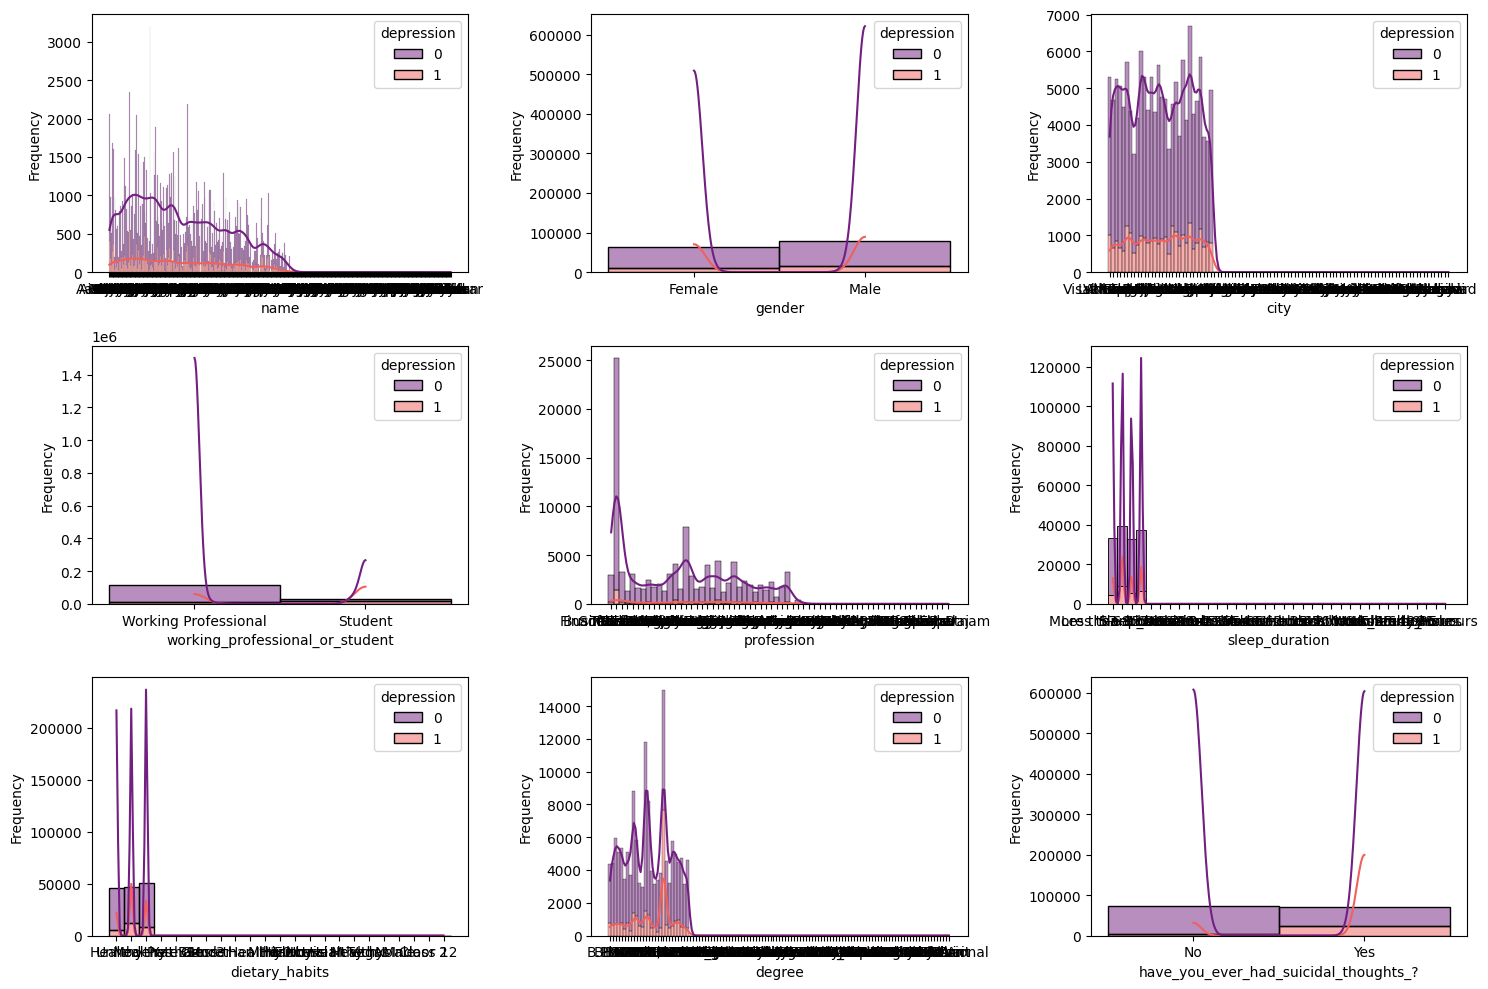

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and 'depression' is the target column
# Select numerical features
cat_c = df.select_dtypes(include=['object'])

# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through the numerical features, skipping the last column if it's the target column
for i, feature in enumerate(cat_c.iloc[:, :-1], 1):  # Exclude the target column
    plt.subplot(3, 3, i)  # Adjust the grid size based on the number of features
    sns.histplot(df, x=feature, hue='depression', kde=True, multiple='stack', palette='magma')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()
